# New Section

In [59]:
import pandas as pd
import numpy as np
db=pd.read_csv('/garments_worker_productivity.csv', parse_dates=["date"])
db["month"]=db["date"].dt.month
db["day_num"]=db["date"].dt.day
db.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,day_num
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1


In [60]:
db.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,day_num
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,1.724311,13.533835
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000,1.000000
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,1.000000,6.000000
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,2.000000,12.000000
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2.000000,21.000000
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,3.000000,31.000000
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,0.744558,8.623967


In [61]:
db.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [62]:
db.drop(["wip"], axis=1, inplace=True)

In [63]:
db_num=db.select_dtypes(include=np.number)
db_cat=db.select_dtypes(exclude=np.number)
db_num.head()
db_cat.head()

,date,quarter,department,day
0,2015-01-01,Quarter1,sweing,Thursday
1,2015-01-01,Quarter1,finishing,Thursday
2,2015-01-01,Quarter1,sweing,Thursday
3,2015-01-01,Quarter1,sweing,Thursday
4,2015-01-01,Quarter1,sweing,Thursday


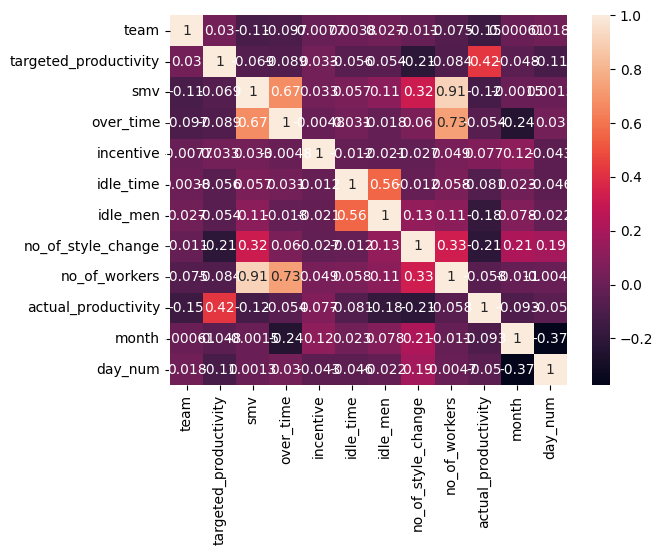

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
cor1=db_num.corr()
sns.heatmap(cor1,annot=True)
plt.show()

In [ ]:
correlations_with_target = cor1['actual_productivity'].sort_values(ascending=False)
print(correlations_with_target)

actual_productivity      1.000000
targeted_productivity    0.421594
incentive                0.076538
day                     -0.050249
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
month                   -0.092914
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
year                          NaN
Name: actual_productivity, dtype: float64


In [70]:
db.drop(["idle_time","idle_men"], axis=1, inplace=True)

In [71]:
from sklearn.preprocessing import OneHotEncoder
OH=OneHotEncoder(handle_unknown='ignore')

# Apply OneHotEncoder only to categorical columns
db_cat_encoded = OH.fit_transform(db_cat)
db_cat_encoded_df = pd.DataFrame(db_cat_encoded.toarray(), columns=OH.get_feature_names_out(db_cat.columns))
db = pd.concat([db_num, db_cat_encoded_df], axis=1)
display(db.head())

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = db.drop("actual_productivity", axis=1)
y = db["actual_productivity"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (957, 84) (957,)
Testing data shape (X_test, y_test): (240, 84) (240,)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)
print("Mean Squared Error:",mse)

Mean Absolute Error: 0.11283531702181386
R2 Score: 0.13030576211919886
Mean Squared Error: 0.023092527137115515


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)
print("Mean Squared Error:",mse)

Mean Absolute Error: 0.068534064901625
R2 Score: 0.555475421860701
Mean Squared Error: 0.01180322397997021


In [75]:
import xgboost as xg
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
xg_model=xg.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
xg_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)
print("Mean Squared Error:",mse)

Mean Absolute Error: 0.11283531702181386
R2 Score: 0.13030576211919886
Mean Squared Error: 0.023092527137115515


In [76]:
from sklearn.model_selection import GridSearchCV
import xgboost as xg

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create an XGBoost Regressor model
xgb_model = xg.XGBRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE score: ", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_xgb_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\nEvaluation of the best XGBoost model on the test set:")
print("Mean Absolute Error:", mae_best)
print("R2 Score:", r2_best)
print("Mean Squared Error:", mse_best)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best negative MSE score:  -0.015880828753527674

Evaluation of the best XGBoost model on the test set:
Mean Absolute Error: 0.07380878542551524
R2 Score: 0.5049584772477429
Mean Squared Error: 0.013144573460681366


In [79]:
import pickle

# Define the filename to save the model
filename = 'best_xgboost_model1.pkl'

# Save the trained model to the file
pickle.dump(best_xgb_model, open(filename, 'wb'))

print(f"Model successfully saved to {filename}")

Model successfully saved to best_xgboost_model1.pkl


Here's how the code to save and load your model works:

**Saving the model (`pickle.dump`)**

1.  **`import pickle`**: This line imports the `pickle` module, which is used for serializing and deserializing Python object structures.
2.  **`filename = 'best_xgboost_model.pkl'`**: This defines the name of the file where you want to save your model. The `.pkl` extension is commonly used for pickle files.
3.  **`pickle.dump(best_xgb_model, open(filename, 'wb'))`**: This is the core line for saving the model:
    *   `pickle.dump()`: This function serializes the Python object (`best_xgb_model` in this case) into a byte stream.
    *   `best_xgb_model`: This is the trained XGBoost model object that you want to save.
    *   `open(filename, 'wb')`: This opens the specified file in binary write mode (`'wb'`). It's important to use binary mode when pickling.
4.  **`print(f"Model successfully saved to {filename}")`**: This line simply confirms that the model has been saved.

**Loading the model later (`pickle.load`)**

When you want to use your saved model in another script or at a later time, you can load it using `pickle.load()`: